In [31]:
import random 
import numpy as np
import pandas as pd
import pickle 

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "r") )

In [33]:
### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = np.reshape( np.array(ages), (len(ages), 1))
net_worths = np.reshape( np.array(net_worths), (len(net_worths), 1))

In [34]:
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

Linear regression line through the points

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(ages_train,net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

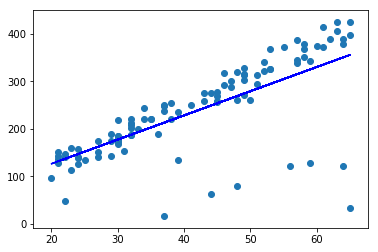

In [37]:
plt.plot(ages, reg.predict(ages), color="blue")

plt.scatter(ages, net_worths)
plt.show()

Line is influenced by the outliers, will have to remove the ones with the higest error to get a more accurate plot.

In [38]:
# slope - should be going towards 6.25
reg.coef_

array([[ 5.07793064]])

In [39]:
reg.score(ages_test,net_worths_test)

0.8782624703664671

In [40]:
# doing this as a function as per the requirements
def outlierCleaner(predictions, ages, net_worths):
    
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    
    diff = predictions-net_worths
    diff_sq = diff**2
    
    df = pd.DataFrame(diff_sq,columns=['Diff sq'])
    df['Diff'] = diff
    df['Ages'] = ages
    df['Net worths'] = net_worths
    
    x = int(len(ages) * 0.1)
    
    ind = list(df.sort_values('Diff sq',ascending=False).head(x).index)
    df = df.drop(ind)
    
    for i in xrange(len(df)):
        cleaned_data.append((df.iloc[i]['Ages'],df.iloc[i]['Net worths'],df.iloc[i]['Diff']))
    
    return cleaned_data

In [41]:
cleaned_data = outlierCleaner(pred,ages_train,net_worths_train)
len(cleaned_data)

81

In [42]:
# unpacking the refined points
ages, net_worths, errors = zip(*cleaned_data)
ages = np.reshape(np.array(ages), (len(ages), 1))
net_worths = np.reshape(np.array(net_worths), (len(net_worths), 1))

In [43]:
reg.fit(ages, net_worths)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

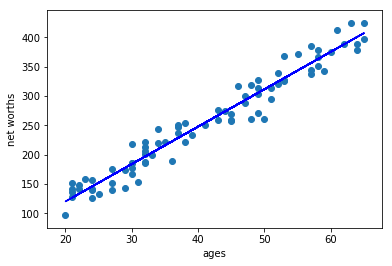

In [44]:
# plotting the new line
plt.plot(ages, reg.predict(ages), color="blue")
plt.scatter(ages, net_worths)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()

In [45]:
# slope is close to 6.25
reg.coef_

array([[ 6.36859481]])

In [47]:
# score significantly improved
reg.score(ages_test,net_worths_test)

0.98318945539553204